POTTERHEADS
- Romauli Graciella Debora
- Deanarani Kharisma
- Zalfa Aretha Fahira Ranstya

# Import Dependency

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [ ]:
# Import Data
data = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP5D,Kitsap,Bremerton,WA,98310.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,23.0,214384901,POINT (-122.61136499999998 47.575195000000065),PUGET SOUND ENERGY INC,5.303508e+10
1,1N4AZ1CP8K,Kitsap,Port Orchard,WA,98366.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,26.0,271008636,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJXCAE28L,King,Seattle,WA,98199.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,36.0,8781552,POINT (-122.394185 47.63919500000003),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,SADHC2S1XK,Thurston,Olympia,WA,98503.0,2019,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,234,0,2.0,8308492,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,5.306701e+10
4,JN1AZ0CP9B,Snohomish,Everett,WA,98204.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,21.0,245524527,POINT (-122.24128499999995 47.91088000000008),PUGET SOUND ENERGY INC,5.306104e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138774,KNAGV4LD6L,Clark,Vancouver,WA,98686.0,2020,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,28,0,17.0,122272881,POINT (-122.64839529999995 45.70104270000007),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
138775,7SAYGDEE1N,Thurston,Lacey,WA,98503.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,187390038,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,5.306701e+10
138776,5YJYGDEE7M,Benton,Richland,WA,99352.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,8.0,181300416,POINT (-119.29441499999996 46.27187500000008),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,5.300501e+10
138777,WBY33AW08P,Pierce,Tacoma,WA,98443.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,25.0,224612055,POINT (-122.36463499999996 47.19449000000003),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10


In [ ]:
data.rename(columns = {'VIN (1-10)': 'VIN',
                       'Postal Code': 'Zipcode',
                       'Model Year': 'Year',
                       'Electric Vehicle Type': 'EVT',
                       'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV',
                       'Electric Range': 'Range',
                       'Base MSRP': 'MSRP',
                       'Legislative District': 'District',
                       'DOL Vehicle ID': 'DOL',
                       'Vehicle Location': 'Location',
                       'Electric Utility': 'Provider',
                       '2020 Census Tract': 'Census2020'}, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138779 entries, 0 to 138778
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   VIN         138779 non-null  object 
 1   County      138776 non-null  object 
 2   City        138776 non-null  object 
 3   State       138779 non-null  object 
 4   Zipcode     138776 non-null  float64
 5   Year        138779 non-null  int64  
 6   Make        138779 non-null  object 
 7   Model       138493 non-null  object 
 8   EVT         138779 non-null  object 
 9   CAFV        138779 non-null  object 
 10  Range       138779 non-null  int64  
 11  MSRP        138779 non-null  int64  
 12  District    138464 non-null  float64
 13  DOL         138779 non-null  int64  
 14  Location    138773 non-null  object 
 15  Provider    138776 non-null  object 
 16  Census2020  138776 non-null  float64
dtypes: float64(3), int64(4), object(10)
memory usage: 18.0+ MB


# Data Pre-Processing & Cleaning

Untuk saat ini dilakukan drop duplikat dan missing values.

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

VIN             0
County          3
City            3
State           0
Zipcode         3
Year            0
Make            0
Model         286
EVT             0
CAFV            0
Range           0
MSRP            0
District      315
DOL             0
Location        6
Provider        3
Census2020      3
dtype: int64

In [ ]:
# Handling missing value
data = data.dropna()

In [ ]:
data.describe()

,Zipcode,Year,Range,MSRP,District,DOL,Census2020
count,138175.000000,138175.000000,138175.000000,138175.000000,138175.000000,1.381750e+05,1.381750e+05
mean,98258.819685,2019.766441,72.448981,1407.425982,29.427190,2.079269e+08,5.303963e+10
std,302.371730,3.012774,97.809794,9551.756736,14.799921,8.464173e+07,1.617000e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.643437e+08,5.303301e+10
50%,98122.000000,2021.000000,21.000000,0.000000,33.000000,2.085477e+08,5.303303e+10
75%,98370.000000,2022.000000,149.000000,0.000000,43.000000,2.342263e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


#EDA & Feature Engineering

In [ ]:
data.Make.value_counts()

TESLA                   63032
NISSAN                  13194
CHEVROLET               11527
FORD                     7046
BMW                      6014
KIA                      5663
TOYOTA                   4923
VOLKSWAGEN               3704
VOLVO                    3036
JEEP                     2938
AUDI                     2787
HYUNDAI                  2625
CHRYSLER                 2381
RIVIAN                   1932
PORSCHE                   980
MERCEDES-BENZ             862
FIAT                      818
HONDA                     799
MITSUBISHI                763
MINI                      758
POLESTAR                  727
SUBARU                    368
SMART                     276
JAGUAR                    222
LINCOLN                   220
LUCID                     160
CADILLAC                  126
LEXUS                      88
GENESIS                    77
MAZDA                      53
LAND ROVER                 43
FISKER                     15
AZURE DYNAMICS              8
TH!NK     

In [ ]:
# Jumlah pembelian mobil setiap tahunnya
data = data.groupby(['Year', 'Make']).size().reset_index(name='Count')

Dari info di atas
Top Three :

1. TESLA                   63032
2. NISSAN                  13194
3. CHEVROLET               11527

Akan dilakukan eksplorasi data untuk top three variabel `Make` perusahaan pembuat kendaraan listrik terbanyak yaitu TESLA, NISSAN, dan CHEVROLET.

In [ ]:
# Keep only Tesla, Nissan, and Chevrolet
data = data[data['Make'].isin(['TESLA', 'NISSAN', 'CHEVROLET'])]

In [ ]:
# Membuat pivot table dengan 'Make' sebagai indeks atas, 'Year' sebagai kolom, dan 'Count' sebagai nilai
pivot_table = data.pivot(index='Make', columns='Year', values='Count').fillna(0).astype(int)
pivot_table

Year,1997,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Make,,,,,,,,,,,,,,,,
CHEVROLET,1,0,0,76,474,798,713,470,301,2738,1152,1007,957,351,914,1575
NISSAN,0,0,0,694,589,1937,640,1840,1172,936,1226,1391,642,473,940,714
TESLA,0,18,21,7,128,771,653,1071,1617,1635,8027,4642,6938,10872,13879,12753


In [ ]:
# Drop row tahun 1997, 2008, 2010, 2023
data = data[~data['Year'].isin([1997, 2008, 2010, 2023])]
data

,Year,Make,Count
10,2011,CHEVROLET,76
11,2011,NISSAN,694
12,2011,TESLA,7
15,2012,CHEVROLET,474
19,2012,NISSAN,589
20,2012,TESLA,128
22,2013,CHEVROLET,798
25,2013,NISSAN,1937
27,2013,TESLA,771
31,2014,CHEVROLET,713


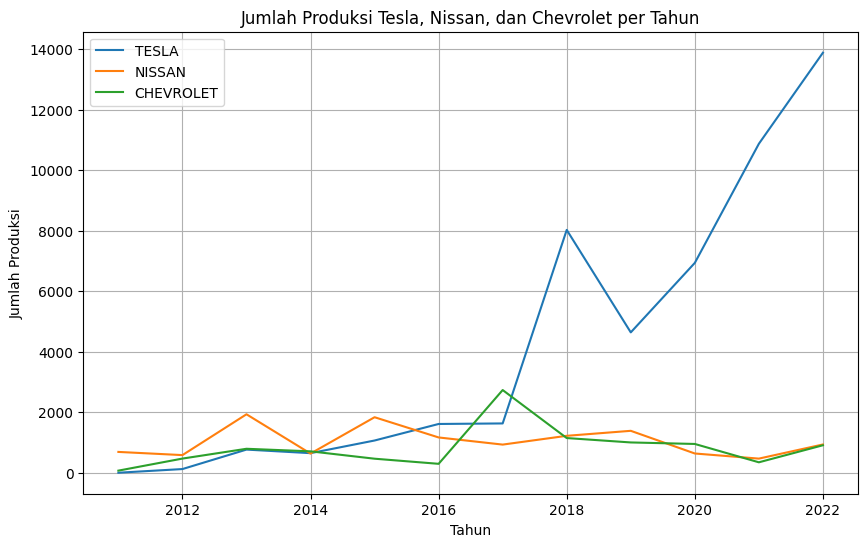

In [ ]:
plt.figure(figsize=(10, 6))
for make in ['TESLA', 'NISSAN', 'CHEVROLET']:
    make_data = data[data['Make'] == make]
    plt.plot(make_data['Year'], make_data['Count'], label=make)

plt.title('Jumlah Produksi Tesla, Nissan, dan Chevrolet per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Produksi')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data_tesla = data.loc[data['Make'] == 'TESLA']
data_tesla

,Year,Make,Count
12,2011,TESLA,7
20,2012,TESLA,128
27,2013,TESLA,771
40,2014,TESLA,653
51,2015,TESLA,1071
67,2016,TESLA,1617
84,2017,TESLA,1635
104,2018,TESLA,8027
125,2019,TESLA,4642
146,2020,TESLA,6938


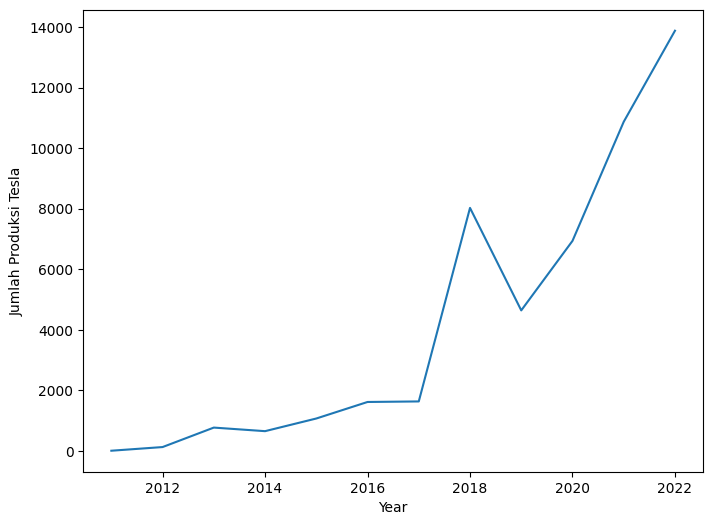

In [ ]:
plt.subplots(figsize=(8,6))
plt.plot(data_tesla['Year'], data_tesla['Count'])
plt.xlabel('Year')
plt.ylabel('Jumlah Produksi Tesla')
plt.show()

In [ ]:
data_nissan = data.loc[data['Make'] == 'NISSAN']
data_nissan

,Year,Make,Count
11,2011,NISSAN,694
19,2012,NISSAN,589
25,2013,NISSAN,1937
37,2014,NISSAN,640
48,2015,NISSAN,1840
64,2016,NISSAN,1172
81,2017,NISSAN,936
101,2018,NISSAN,1226
121,2019,NISSAN,1391
144,2020,NISSAN,642


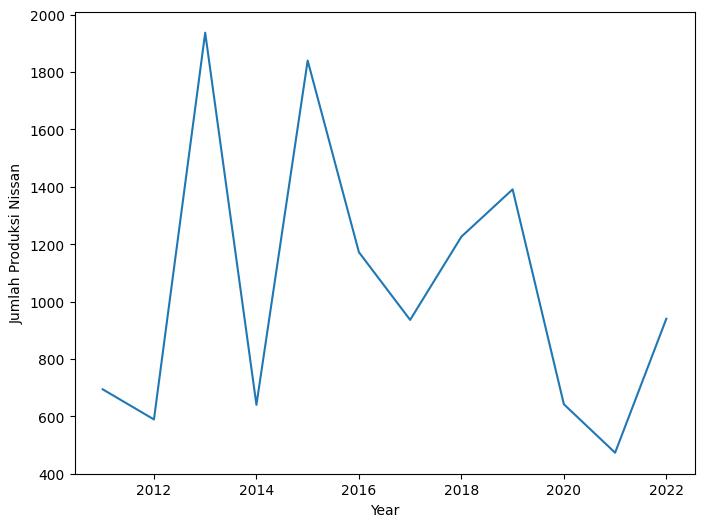

In [ ]:
plt.subplots(figsize=(8,6))
plt.plot(data_nissan['Year'], data_nissan['Count'])
plt.xlabel('Year')
plt.ylabel('Jumlah Produksi Nissan')
plt.show()

In [ ]:
data_chevrolet = data.loc[data['Make'] == 'CHEVROLET']
data_chevrolet

,Year,Make,Count
10,2011,CHEVROLET,76
15,2012,CHEVROLET,474
22,2013,CHEVROLET,798
31,2014,CHEVROLET,713
43,2015,CHEVROLET,470
57,2016,CHEVROLET,301
73,2017,CHEVROLET,2738
91,2018,CHEVROLET,1152
110,2019,CHEVROLET,1007
132,2020,CHEVROLET,957


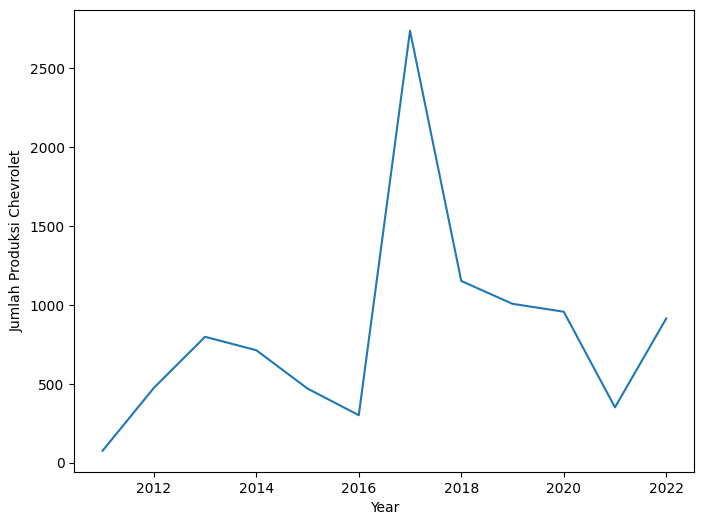

In [ ]:
plt.subplots(figsize=(8,6))
plt.plot(data_chevrolet['Year'], data_chevrolet['Count'])
plt.xlabel('Year')
plt.ylabel('Jumlah Produksi Chevrolet')
plt.show()

# Modeling & Evaluation

## Modeling: Polynomial Regression

### TESLA

In [ ]:
# Separate features and target
X = data_tesla['Year'].values.reshape(-1, 1)  # Reshape for single feature
y = data_tesla['Count'].values

# Splitting data into training and testing sets
X_train = X[:10]
y_train = y[:10]

X_test = X[10:]
y_test = y[10:]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [ ]:
# Transform features to polynomial features
poly = PolynomialFeatures(degree=6)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)

# Creating and training the polynomial regression model
lin = LinearRegression()
poly.fit(X_poly_train, y_train)
lin.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
# Predicted ‘count’ for the test data
y_pred = lin.predict(X_test_poly)
mean_absolute_error(y_test, y_pred)

50062.38181818179

In [ ]:
# Model performing on training data
y_pred_train = lin.predict(X_poly_train)
mean_absolute_error(y_train, y_pred_train)

793.7313286713269

Pada data train, *mean absolute error* jauh lebih kecil daripada *mean absolute error* pada data test. Ini berarti model telah mempelajari data train dengan sangat baik sehingga hanya dapat berperforma baik pada data train.

Ketika kita mencoba beberapa data baru, model berperforma buruk. Hal ini disebut sebagai overfitting. Kami tidak ingin terjadi overfitting. Kami ingin model dapat berperforma baik pada berbagai data. Oleh karena itu, kami melakukan hyperparameter tuning untuk menghasilkan kinerja model yang terbaik.

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)

lin = LinearRegression()
lin.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
# test data
y_pred = lin.predict(X_test_poly)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-1.5345184806784982
2333.1212121212066
5729310.073425134


In [ ]:
# training data
y_pred_train = lin.predict(X_poly_train)
print(r2_score(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))

0.768289120398295
823.2800000000007
1775370.2169696968


Error pada data train dengan degree 2 menghasilkan nilai yang lebih kecil dibandingkan dengan degree 6 sehingga akan dipilih degree 2 untuk digunakan pada model Polynomial Regression.

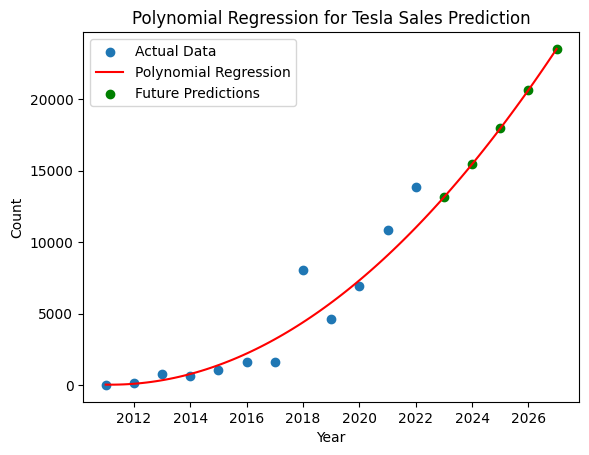

Predicted Sales for Future Years:
Year: 2023, Predicted Count: 13136.76
Year: 2024, Predicted Count: 15450.15
Year: 2025, Predicted Count: 17951.39
Year: 2026, Predicted Count: 20640.47
Year: 2027, Predicted Count: 23517.41


In [ ]:
# Predicting sales for future years
future_years = np.array([2023, 2024, 2025, 2026, 2027])
X_future = future_years.reshape(-1, 1)
X_future_scaled = scaler.transform(X_future)  # Assuming you have an X_scaler
X_future_poly = poly.transform(X_future_scaled)
y_future_pred = lin.predict(X_future_poly)

# Visualizing the results
X_range = np.linspace(min(X), max(X_future), 100)
X_range_scaled = scaler.transform(X_range.reshape(-1, 1))
X_range_poly = poly.transform(X_range_scaled)
y_range_pred = lin.predict(X_range_poly)

plt.scatter(X, y, label="Actual Data")
plt.plot(X_range, y_range_pred, color='red', label="Polynomial Regression")
plt.scatter(future_years, y_future_pred, color='green', label="Future Predictions")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Polynomial Regression for Tesla Sales Prediction")
plt.legend()
plt.show()

print("Predicted Sales for Future Years:")
for year, count in zip(future_years, y_future_pred):
    print(f"Year: {year}, Predicted Count: {count:.2f}")

### NISSAN

In [ ]:
# Separate features and target
X = data_nissan['Year'].values.reshape(-1, 1)  # Reshape for single feature
y = data_nissan['Count'].values

# Splitting data into training and testing sets
X_train = X[:10]
y_train = y[:10]

X_test = X[10:]
y_test = y[10:]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [ ]:
# Transform features to polynomial features
poly = PolynomialFeatures(degree=6)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)

# Creating and training the polynomial regression model
lin = LinearRegression()
poly.fit(X_poly_train, y_train)
lin.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
# Predicted ‘count’ for the test data
y_pred = lin.predict(X_test_poly)
mean_absolute_error(y_test, y_pred)

8102.018181818197

In [ ]:
# Model performing on training data
y_pred_train = lin.predict(X_poly_train)
mean_absolute_error(y_train, y_pred_train)

245.85165501165483

Pada data train, *mean absolute error* jauh lebih kecil daripada *mean absolute error* pada data test. Ini berarti model telah mempelajari data train dengan sangat baik sehingga hanya dapat berperforma baik pada data train.

Ketika kita mencoba beberapa data baru, model berperforma buruk. Hal ini disebut sebagai overfitting. Kami tidak ingin terjadi overfitting. Kami ingin model dapat berperforma baik pada berbagai data. Oleh karena itu, kami melakukan hyperparameter tuning untuk menghasilkan kinerja model yang terbaik.

In [ ]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)

lin = LinearRegression()
lin.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
# test data
y_pred = lin.predict(X_test_poly)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-1.0562657661084738
315.23484848484867
112112.23616620773


In [ ]:
# training data
y_pred_train = lin.predict(X_poly_train)
print(r2_score(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))

0.22566482551657252
348.90046620046616
172496.95102564103


Error pada data train dengan degree 3 menghasilkan nilai yang lebih kecil dibandingkan dengan degree 6 sehingga akan dipilih degree 3 untuk digunakan pada model Polynomial Regression.

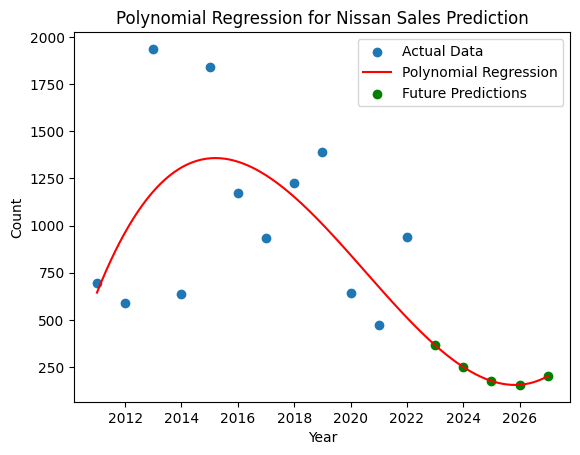

Predicted Sales for Future Years:
Year: 2023, Predicted Count: 366.23
Year: 2024, Predicted Count: 250.39
Year: 2025, Predicted Count: 176.39
Year: 2026, Predicted Count: 156.25
Year: 2027, Predicted Count: 201.99


In [ ]:
# Predicting sales for future years
future_years = np.array([2023, 2024, 2025, 2026, 2027])
X_future = future_years.reshape(-1, 1)
X_future_scaled = scaler.transform(X_future)  # Assuming you have an X_scaler
X_future_poly = poly.transform(X_future_scaled)
y_future_pred = lin.predict(X_future_poly)

# Visualizing the results
X_range = np.linspace(min(X), max(X_future), 100)
X_range_scaled = scaler.transform(X_range.reshape(-1, 1))
X_range_poly = poly.transform(X_range_scaled)
y_range_pred = lin.predict(X_range_poly)

plt.scatter(X, y, label="Actual Data")
plt.plot(X_range, y_range_pred, color='red', label="Polynomial Regression")
plt.scatter(future_years, y_future_pred, color='green', label="Future Predictions")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Polynomial Regression for Nissan Sales Prediction")
plt.legend()
plt.show()

print("Predicted Sales for Future Years:")
for year, count in zip(future_years, y_future_pred):
    print(f"Year: {year}, Predicted Count: {count:.2f}")

### CHEVROLET

In [ ]:
# Separate features and target
X = data_chevrolet['Year'].values.reshape(-1, 1)  # Reshape for single feature
y = data_chevrolet['Count'].values

# Splitting data into training and testing sets
X_train = X[:10]
y_train = y[:10]

X_test = X[10:]
y_test = y[10:]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [ ]:
# Transform features to polynomial features
poly = PolynomialFeatures(degree=6)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)

# Creating and training the polynomial regression model
lin = LinearRegression()
poly.fit(X_poly_train, y_train)
lin.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
# Predicted ‘count’ for the test data
y_pred = lin.predict(X_test_poly)
mean_absolute_error(y_test, y_pred)

31671.41818181821

In [ ]:
# Model performing on training data
y_pred_train = lin.predict(X_poly_train)
mean_absolute_error(y_train, y_pred_train)

291.34354312354486

Pada data train, *mean absolute error* jauh lebih kecil daripada *mean absolute error* pada data test. Ini berarti model telah mempelajari data train dengan sangat baik sehingga hanya dapat berperforma baik pada data train.

Ketika kita mencoba beberapa data baru, model berperforma buruk. Hal ini disebut sebagai overfitting. Kami tidak ingin terjadi overfitting. Kami ingin model dapat berperforma baik pada berbagai data. Oleh karena itu, kami melakukan hyperparameter tuning untuk menghasilkan kinerja model yang terbaik.

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)

lin = LinearRegression()
lin.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
# test data
y_pred = lin.predict(X_test_poly)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-1.6568026878823838
364.42878787878783
210531.02279384783


In [ ]:
# training data
y_pred_train = lin.predict(X_poly_train)
print(r2_score(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))

0.2913998501539651
370.9975757575759
346938.59803030296


Error pada data train dengan degree 3 menghasilkan nilai yang lebih kecil dibandingkan dengan degree 6 sehingga akan dipilih degree 3 untuk digunakan pada model Polynomial Regression.

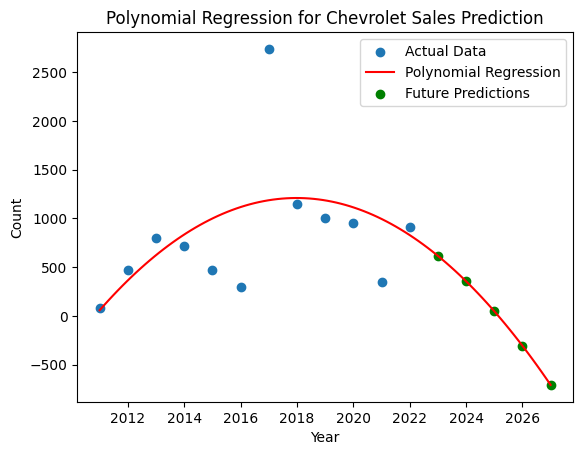

Predicted Sales for Future Years:
Year: 2023, Predicted Count: 615.33
Year: 2024, Predicted Count: 355.12
Year: 2025, Predicted Count: 47.74
Year: 2026, Predicted Count: -306.81
Year: 2027, Predicted Count: -708.54


In [ ]:
# Predicting sales for future years
future_years = np.array([2023, 2024, 2025, 2026, 2027])
X_future = future_years.reshape(-1, 1)
X_future_scaled = scaler.transform(X_future)  # Assuming you have an X_scaler
X_future_poly = poly.transform(X_future_scaled)
y_future_pred = lin.predict(X_future_poly)

# Visualizing the results
X_range = np.linspace(min(X), max(X_future), 100)
X_range_scaled = scaler.transform(X_range.reshape(-1, 1))
X_range_poly = poly.transform(X_range_scaled)
y_range_pred = lin.predict(X_range_poly)

plt.scatter(X, y, label="Actual Data")
plt.plot(X_range, y_range_pred, color='red', label="Polynomial Regression")
plt.scatter(future_years, y_future_pred, color='green', label="Future Predictions")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Polynomial Regression for Chevrolet Sales Prediction")
plt.legend()
plt.show()

print("Predicted Sales for Future Years:")
for year, count in zip(future_years, y_future_pred):
    print(f"Year: {year}, Predicted Count: {count:.2f}")